In [1136]:
import numpy as np
import pandas as pd
import sklearn
import geopandas as gpd 
from geopandas import GeoDataFrame
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [1137]:
beat_file = pd.read_csv('PoliceBeatDec2012.csv')
beat_file=beat_file.drop(columns = ['the_geom','SECTOR','BEAT'])

In [1138]:
clean_crash = pd.read_csv('crash_clean.csv')

/Users/winsometang/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [1139]:
clean_vehicles = pd.read_csv('clean_vehicles.csv')

In [1140]:
clean_people = pd.read_csv('clean_people.csv')

/Users/winsometang/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (4,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [1141]:
clean_crash.describe()

,Unnamed: 0,POSTED_SPEED_LIMIT,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LANE_CNT
count,517282.00000,517282.000000,517282.000000,517282.000000,517282.000000,514382.000000,514382.000000,1.989660e+05
mean,258640.50000,28.302120,13.242158,4.126892,6.573674,41.855046,-87.673046,1.333242e+01
std,149326.59531,6.444674,5.506523,1.977442,3.438811,0.336088,0.683169,2.961921e+03
min,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000,-87.934763,0.000000e+00
25%,129320.25000,30.000000,9.000000,2.000000,4.000000,41.782219,-87.721285,2.000000e+00
50%,258640.50000,30.000000,14.000000,4.000000,7.000000,41.875409,-87.673455,2.000000e+00
75%,387960.75000,30.000000,17.000000,6.000000,10.000000,41.924046,-87.632828,4.000000e+00
max,517281.00000,99.000000,23.000000,7.000000,12.000000,42.022780,0.000000,1.191625e+06


In [1142]:
clean_people.describe()

,Unnamed: 0,AGE,BAC_RESULT VALUE
count,1.142379e+06,815720.000000,1.142379e+06
mean,5.715878e+05,37.847115,2.140358e-04
std,3.299286e+05,17.106371,6.961254e-03
min,0.000000e+00,-177.000000,0.000000e+00
25%,2.858925e+05,25.000000,0.000000e+00
50%,5.716430e+05,35.000000,0.000000e+00
75%,8.573105e+05,50.000000,0.000000e+00
max,1.142962e+06,110.000000,1.000000e+00


In [1143]:
clean_vehicles.describe()

,Unnamed: 0,CRASH_UNIT_ID
count,1.057474e+06,1.057474e+06
mean,5.287365e+05,5.642652e+05
std,3.052666e+05,3.276157e+05
min,0.000000e+00,2.000000e+00
25%,2.643682e+05,2.790312e+05
50%,5.287365e+05,5.645995e+05
75%,7.931048e+05,8.490518e+05
max,1.057473e+06,1.129364e+06


In [1144]:
clean_vehicles.head(10)

,Unnamed: 0,CRASH_UNIT_ID,CRASH_RECORD_ID,CRASH_DATE,MAKE,MODEL,VEHICLE_TYPE,VEHICLE_DEFECT,TRAVEL_DIRECTION,MANEUVER,FIRST_CONTACT_POINT,FIRE_I
0,0,829999,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,01/22/2020 06:25:00 AM,INFINITI,UNKNOWN,PASSENGER,NONE,N,STRAIGHT AHEAD,FRONT,N
1,1,749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,09/28/2019 03:30:00 AM,HONDA,CIVIC,PASSENGER,UNKNOWN,N,STRAIGHT AHEAD,FRONT,N
2,2,749949,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,09/28/2019 03:30:00 AM,TOYOTA,YARIS,UNKNOWN/NA,NONE,N,PARKED,ROOF,N
3,3,749950,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,09/28/2019 03:30:00 AM,GENERAL MOTORS CORPORATION (GMC),SIERRA,UNKNOWN/NA,UNKNOWN,N,PARKED,ROOF,N
4,4,871921,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,04/13/2020 10:50:00 PM,BUICK,ENCORE,PASSENGER,NONE,W,STRAIGHT AHEAD,FRONT-RIGHT,N
5,5,473653,80f5b6eff349a72094c9c7a11745549caa8bd39b57cedd...,09/09/2018 08:50:00 AM,LINCOLN-CONTINENTAL,MKT,PASSENGER,NONE,S,PARKED,FRONT-LEFT,N
6,6,834812,ecf9e646f89a73ed3df0f373e4fbd18e91f5a595004019...,02/03/2020 03:45:00 PM,HONDA,CRV,PASSENGER,NONE,W,STRAIGHT AHEAD,OTHER,N
7,7,834813,ecf9e646f89a73ed3df0f373e4fbd18e91f5a595004019...,02/03/2020 03:45:00 PM,SUBARU,FORESTER,PASSENGER,NONE,S,STRAIGHT AHEAD,ROOF,N
8,8,837380,c7c57a49274b3aa953d0b76346f68e116ed8c3d72a683a...,02/06/2020 12:00:00 AM,UNKNOWN,UNKNOWN,UNKNOWN/NA,UNKNOWN,UNKNOWN,UNKNOWN/NA,UNKNOWN,N
9,9,837381,c7c57a49274b3aa953d0b76346f68e116ed8c3d72a683a...,02/06/2020 12:00:00 AM,INFINITI,UNKNOWN,PASSENGER,UNKNOWN,UNKNOWN,PARKED,TOTAL (ALL AREAS),N


In [1145]:
clean_crash.head(10)

,Unnamed: 0,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,...,INJURIES_TOTAL,INJURIES_FATAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,TRAFFICWAY_TYPE,LANE_CNT
0,0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,07/10/2019 05:56:00 PM,35,CLEAR,DAYLIGHT,TURNING,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,17,4,7,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993),ONE-WAY,NaN
1,1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,06/30/2017 04:00:00 PM,35,CLEAR,DAYLIGHT,TURNING,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,16,6,6,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989),NOT DIVIDED,4.0
2,2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,07/10/2020 10:25:00 AM,30,CLEAR,DAYLIGHT,REAR END,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,10,6,7,41.773456,-87.585022,POINT (-87.585022352022 41.773455972008),FOUR WAY,NaN
3,3,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,07/11/2020 01:00:00 AM,30,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,1,7,7,41.802119,-87.622115,POINT (-87.622114914961 41.802118543011),DIVIDED - W/MEDIAN (NOT RAISED),NaN
4,4,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,07/08/2020 02:00:00 PM,20,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,14,4,7,NaN,NaN,NaN,DRIVEWAY,NaN
5,5,00e47f189660cd8ba1e85fc63061bf1d8465184393f134...,03/21/2019 10:50:00 PM,30,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,22,5,3,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989),NOT DIVIDED,4.0
6,6,0126747fc9ffc0edc9a38abb83d80034f897db0f739eef...,03/26/2018 02:23:00 PM,35,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,14,2,3,41.953647,-87.732082,POINT (-87.732081736006 41.953646899951),NOT DIVIDED,NaN
7,7,f636d4a51a88015ac89031159b1f1952b8d92e49d11aeb...,07/10/2020 10:20:00 PM,30,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE OPPOSITE DIRECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,1.0,0.0,22,6,7,41.880386,-87.725807,POINT (-87.725807044026 41.880385884998),NOT DIVIDED,NaN
8,8,76aabcf7c2219a5c90259c96fe94b33834ddb53e0dbcd3...,07/09/2020 05:06:00 PM,10,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,...,0.0,0.0,17,5,7,NaN,NaN,NaN,PARKING LOT,NaN
9,9,9c974548026c1b962569040bd8fa08ae643ffc28c15ebd...,06/29/2020 05:55:00 PM,10,CLOUDY/OVERCAST,DAWN,PARKED MOTOR VEHICLE,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,17,2,6,NaN,NaN,NaN,PARKING LOT,NaN


In [1146]:
clean_vehicles.head(10)

,Unnamed: 0,CRASH_UNIT_ID,CRASH_RECORD_ID,CRASH_DATE,MAKE,MODEL,VEHICLE_TYPE,VEHICLE_DEFECT,TRAVEL_DIRECTION,MANEUVER,FIRST_CONTACT_POINT,FIRE_I
0,0,829999,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,01/22/2020 06:25:00 AM,INFINITI,UNKNOWN,PASSENGER,NONE,N,STRAIGHT AHEAD,FRONT,N
1,1,749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,09/28/2019 03:30:00 AM,HONDA,CIVIC,PASSENGER,UNKNOWN,N,STRAIGHT AHEAD,FRONT,N
2,2,749949,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,09/28/2019 03:30:00 AM,TOYOTA,YARIS,UNKNOWN/NA,NONE,N,PARKED,ROOF,N
3,3,749950,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,09/28/2019 03:30:00 AM,GENERAL MOTORS CORPORATION (GMC),SIERRA,UNKNOWN/NA,UNKNOWN,N,PARKED,ROOF,N
4,4,871921,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,04/13/2020 10:50:00 PM,BUICK,ENCORE,PASSENGER,NONE,W,STRAIGHT AHEAD,FRONT-RIGHT,N
5,5,473653,80f5b6eff349a72094c9c7a11745549caa8bd39b57cedd...,09/09/2018 08:50:00 AM,LINCOLN-CONTINENTAL,MKT,PASSENGER,NONE,S,PARKED,FRONT-LEFT,N
6,6,834812,ecf9e646f89a73ed3df0f373e4fbd18e91f5a595004019...,02/03/2020 03:45:00 PM,HONDA,CRV,PASSENGER,NONE,W,STRAIGHT AHEAD,OTHER,N
7,7,834813,ecf9e646f89a73ed3df0f373e4fbd18e91f5a595004019...,02/03/2020 03:45:00 PM,SUBARU,FORESTER,PASSENGER,NONE,S,STRAIGHT AHEAD,ROOF,N
8,8,837380,c7c57a49274b3aa953d0b76346f68e116ed8c3d72a683a...,02/06/2020 12:00:00 AM,UNKNOWN,UNKNOWN,UNKNOWN/NA,UNKNOWN,UNKNOWN,UNKNOWN/NA,UNKNOWN,N
9,9,837381,c7c57a49274b3aa953d0b76346f68e116ed8c3d72a683a...,02/06/2020 12:00:00 AM,INFINITI,UNKNOWN,PASSENGER,UNKNOWN,UNKNOWN,PARKED,TOTAL (ALL AREAS),N


In [1147]:
clean_people.shape

(1142379, 16)

In [1148]:
clean_vehicles.shape

(1057474, 12)

In [1149]:
clean_crash.shape

(517282, 27)

In [1150]:
clean_crash.drop_duplicates(inplace=True)
clean_vehicles.drop_duplicates(inplace= True)
clean_people.drop_duplicates(inplace = True)

In [1151]:
mergeddf=clean_people.merge(clean_vehicles,on='CRASH_RECORD_ID').merge(clean_crash,on='CRASH_RECORD_ID')

In [1152]:
mergeddf.describe()

,Unnamed: 0_x,AGE,BAC_RESULT VALUE,Unnamed: 0_y,CRASH_UNIT_ID,Unnamed: 0,POSTED_SPEED_LIMIT,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LANE_CNT
count,2.412776e+06,1.727995e+06,2.412776e+06,2.412776e+06,2.412776e+06,2.412776e+06,2.412776e+06,2.412776e+06,2.412776e+06,2.412776e+06,2.399324e+06,2.399324e+06,9.296760e+05
mean,5.702466e+05,3.773590e+01,2.414066e-04,5.250276e+05,5.676385e+05,2.542429e+05,2.886386e+01,1.350763e+01,4.148680e+00,6.590377e+00,4.185222e+01,-8.766854e+01,9.349354e+00
std,3.327499e+05,1.710756e+01,7.356951e-03,3.068851e+05,3.259501e+05,1.514699e+05,5.905738e+00,5.394394e+00,1.988100e+00,3.423331e+00,4.496020e-01,9.267125e-01,2.110810e+03
min,0.000000e+00,-1.770000e+02,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-8.793476e+01,0.000000e+00
25%,2.797910e+05,2.500000e+01,0.000000e+00,2.577478e+05,2.850108e+05,1.219690e+05,3.000000e+01,1.000000e+01,2.000000e+00,4.000000e+00,4.178215e+01,-8.772162e+01,2.000000e+00
50%,5.696345e+05,3.500000e+01,0.000000e+00,5.244035e+05,5.697720e+05,2.540475e+05,3.000000e+01,1.400000e+01,4.000000e+00,7.000000e+00,4.187489e+01,-8.767357e+01,2.000000e+00
75%,8.599260e+05,5.000000e+01,0.000000e+00,7.905772e+05,8.496552e+05,3.854432e+05,3.000000e+01,1.700000e+01,6.000000e+00,1.000000e+01,4.192198e+01,-8.763256e+01,4.000000e+00
max,1.142962e+06,1.100000e+02,1.000000e+00,1.057473e+06,1.129364e+06,5.172810e+05,9.900000e+01,2.300000e+01,7.000000e+00,1.200000e+01,4.202278e+01,0.000000e+00,1.191625e+06


In [1153]:

mergeddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2412776 entries, 0 to 2412775
Data columns (total 53 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0_x             int64  
 1   PERSON_ID                object 
 2   PERSON_TYPE              object 
 3   CRASH_RECORD_ID          object 
 4   VEHICLE_ID               object 
 5   CRASH_DATE_x             object 
 6   SEX                      object 
 7   AGE                      float64
 8   EJECTION                 object 
 9   INJURY_CLASSIFICATION    object 
 10  AIRBAG_DEPLOYED          object 
 11  DRIVER_ACTION            object 
 12  PEDPEDAL_ACTION          object 
 13  PHYSICAL_CONDITION       object 
 14  BAC_RESULT VALUE         float64
 15  SAFETY_EQUIPMENT         object 
 16  Unnamed: 0_y             int64  
 17  CRASH_UNIT_ID            int64  
 18  CRASH_DATE_y             object 
 19  MAKE                     object 
 20  MODEL                    object 
 21  VEHICLE_

In [1154]:
mergeddf.drop_duplicates(inplace = True)
mergeddf.shape

(2412776, 53)

In [1155]:
mergeddf['MOST_SEVERE_INJURY'].value_counts()


NO INDICATION OF INJURY     1975459
NONINCAPACITATING INJURY     239348
REPORTED, NOT EVIDENT        136521
INCAPACITATING INJURY         57052
FATAL                          4396
Name: MOST_SEVERE_INJURY, dtype: int64

In [1156]:
mergeddf['INJURIES_FATAL'].value_counts()

0.0    2408380
1.0       3991
2.0        297
3.0         68
4.0         40
Name: INJURIES_FATAL, dtype: int64

In [1157]:
mergeddf["FATAL"]= pd.to_numeric(mergeddf["INJURIES_FATAL"])


In [1158]:
mergeddf['FATAL'].value_counts()



0.0    2408380
1.0       3991
2.0        297
3.0         68
4.0         40
Name: FATAL, dtype: int64

In [1159]:
mergeddf.isnull().sum()


Unnamed: 0_x                     0
PERSON_ID                        0
PERSON_TYPE                      0
CRASH_RECORD_ID                  0
VEHICLE_ID                       0
CRASH_DATE_x                     0
SEX                              0
AGE                         684781
EJECTION                         0
INJURY_CLASSIFICATION            0
AIRBAG_DEPLOYED                  0
DRIVER_ACTION               501731
PEDPEDAL_ACTION                  0
PHYSICAL_CONDITION               0
BAC_RESULT VALUE                 0
SAFETY_EQUIPMENT                 0
Unnamed: 0_y                     0
CRASH_UNIT_ID                    0
CRASH_DATE_y                     0
MAKE                             0
MODEL                            0
VEHICLE_TYPE                     0
VEHICLE_DEFECT                   0
TRAVEL_DIRECTION                 0
MANEUVER                         0
FIRST_CONTACT_POINT              0
FIRE_I                           0
Unnamed: 0                       0
CRASH_DATE          

In [1160]:
mergeddf.FATAL[mergeddf.FATAL > 0] = 1
mergeddf.FATAL[mergeddf.FATAL == 0] = 0

/var/folders/nt/rg8_jkq90v77r8l8dc_9wl0m0000gn/T/ipykernel_17213/2906185067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergeddf.FATAL[mergeddf.FATAL > 0] = 1
/var/folders/nt/rg8_jkq90v77r8l8dc_9wl0m0000gn/T/ipykernel_17213/2906185067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergeddf.FATAL[mergeddf.FATAL == 0] = 0


In [1161]:
mergeddf.FATAL.value_counts()



0.0    2408380
1.0       4396
Name: FATAL, dtype: int64

In [1162]:
model_data =mergeddf.drop(columns=['Unnamed: 0_x','Unnamed: 0','CRASH_DATE_x','CRASH_DATE_y','CRASH_DATE_y','Unnamed: 0_y','PERSON_ID','CRASH_RECORD_ID', 'VEHICLE_ID','CRASH_DATE','INJURIES_FATAL','LATITUDE', 'LONGITUDE', 'LOCATION','MOST_SEVERE_INJURY','INJURY_CLASSIFICATION'])


In [1163]:
ten_samp = model_data[['EJECTION','AIRBAG_DEPLOYED',
       'SAFETY_EQUIPMENT',
       'MODEL','FIRST_CONTACT_POINT','INJURIES_TOTAL','SEX','AGE','CRASH_HOUR','CRASH_MONTH']]


In [1164]:
model_data.columns

Index(['PERSON_TYPE', 'SEX', 'AGE', 'EJECTION', 'AIRBAG_DEPLOYED',
       'DRIVER_ACTION', 'PEDPEDAL_ACTION', 'PHYSICAL_CONDITION',
       'BAC_RESULT VALUE', 'SAFETY_EQUIPMENT', 'CRASH_UNIT_ID', 'MAKE',
       'MODEL', 'VEHICLE_TYPE', 'VEHICLE_DEFECT', 'TRAVEL_DIRECTION',
       'MANEUVER', 'FIRST_CONTACT_POINT', 'FIRE_I', 'POSTED_SPEED_LIMIT',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_DIRECTION',
       'BEAT_OF_OCCURRENCE', 'WORK_ZONE_I', 'INJURIES_TOTAL', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'TRAFFICWAY_TYPE', 'LANE_CNT',
       'FATAL'],
      dtype='object')

In [1165]:
model_data['INJURIES_TOTAL'] = pd.to_numeric(model_data['INJURIES_TOTAL'])
model_data.INJURIES_TOTAL[model_data.INJURIES_TOTAL > 0] = 1
model_data.INJURIES_TOTAL[model_data.INJURIES_TOTAL == 0] = 0


/var/folders/nt/rg8_jkq90v77r8l8dc_9wl0m0000gn/T/ipykernel_17213/2086929565.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data.INJURIES_TOTAL[model_data.INJURIES_TOTAL > 0] = 1
/var/folders/nt/rg8_jkq90v77r8l8dc_9wl0m0000gn/T/ipykernel_17213/2086929565.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data.INJURIES_TOTAL[model_data.INJURIES_TOTAL == 0] = 0


In [1166]:
model_data.shape

(2412776, 39)

In [1167]:
model_data['INJURIES_TOTAL'].value_counts()

0.0    1975459
1.0     437317
Name: INJURIES_TOTAL, dtype: int64

In [1168]:
injured_df = model_data[model_data['INJURIES_TOTAL']>0]
non_injured_df = model_data[model_data['INJURIES_TOTAL']==0]
fata_sub = model_data[model_data['FATAL']>0]

In [1169]:
model_data['AGE']= model_data['AGE'].abs()

In [1170]:
# pd.to_numeric(model_data.CRASH_MONTH)
# model_data.CRASH_MONTH[model_data["CRASH_MONTH"]<=3] = "Q1"
# model_data.CRASH_MONTH[model_data["CRASH_MONTH"]>=10] = "Q4"
# model_data.CRASH_MONTH[model_data["CRASH_MONTH"]==9] = "Q3"
# model_data.CRASH_MONTH[model_data["CRASH_MONTH"]==8] = "Q3"
# model_data.CRASH_MONTH[model_data["CRASH_MONTH"]==7] = "Q3"
# model_data.CRASH_MONTH[model_data["CRASH_MONTH"]==4] = "Q2"
# model_data.CRASH_MONTH[model_data["CRASH_MONTH"]==5] = "Q2"
# model_data.CRASH_MONTH[model_data["CRASH_MONTH"]==6] = "Q2"

In [1171]:
model_data.CRASH_MONTH.value_counts()

6     225379
5     222036
10    218377
12    205543
9     202761
11    199098
8     196878
3     192852
1     190563
7     188483
2     186656
4     184150
Name: CRASH_MONTH, dtype: int64

In [1172]:
model_data["BEAT_OF_OCCURRENCE"].value_counts()

1834.0     23990
114.0      20627
122.0      18483
1831.0     18322
813.0      18106
           ...  
1652.0       354
1655.0       308
UNKNOWN       24
1653.0         4
6100.0         2
Name: BEAT_OF_OCCURRENCE, Length: 548, dtype: int64

In [1173]:
model_data['BEAT_NUM']= model_data["BEAT_OF_OCCURRENCE"]

In [1174]:
model_data = model_data[model_data["BEAT_NUM"]!='UNKNOWN']
model_data['BEAT_NUM']=model_data['BEAT_NUM'].astype(float).astype(int)


In [1175]:
model_data['BEAT_NUM']

0          1531
1          1531
2          1531
3           613
4           613
           ... 
2412771    1422
2412772    1732
2412773    1732
2412774    1732
2412775    1732
Name: BEAT_NUM, Length: 2412752, dtype: int64

In [1176]:
test=pd.merge(model_data,beat_file, how= 'inner', left_on=['BEAT_NUM'],right_on =['BEAT_NUM'])

In [1177]:
test

,PERSON_TYPE,SEX,AGE,EJECTION,AIRBAG_DEPLOYED,DRIVER_ACTION,PEDPEDAL_ACTION,PHYSICAL_CONDITION,BAC_RESULT VALUE,SAFETY_EQUIPMENT,...,WORK_ZONE_I,INJURIES_TOTAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,TRAFFICWAY_TYPE,LANE_CNT,FATAL,BEAT_NUM,DISTRICT
0,DRIVER,M,25.0,NONE,DEPLOYMENT UNKNOWN,UNKNOWN,UNKNOWN/NA,UNKNOWN,0.0,NONE PRESENT,...,N,0.0,3,7,9,NOT DIVIDED,NaN,0.0,1531,15
1,DRIVER,M,25.0,NONE,DEPLOYMENT UNKNOWN,UNKNOWN,UNKNOWN/NA,UNKNOWN,0.0,NONE PRESENT,...,N,0.0,3,7,9,NOT DIVIDED,NaN,0.0,1531,15
2,DRIVER,M,25.0,NONE,DEPLOYMENT UNKNOWN,UNKNOWN,UNKNOWN/NA,UNKNOWN,0.0,NONE PRESENT,...,N,0.0,3,7,9,NOT DIVIDED,NaN,0.0,1531,15
3,DRIVER,X,NaN,UNKNOWN,DEPLOYMENT UNKNOWN,EVADING POLICE VEHICLE,UNKNOWN/NA,UNKNOWN,0.0,USAGE UNKNOWN,...,N,0.0,1,7,2,ALLEY,NaN,0.0,1531,15
4,PASSENGER,F,19.0,NONE,NOT APPLICABLE,NaN,UNKNOWN/NA,UNKNOWN,0.0,USAGE UNKNOWN,...,N,0.0,1,7,2,ALLEY,NaN,0.0,1531,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2412745,PASSENGER,M,NaN,NONE,DID NOT DEPLOY,NaN,UNKNOWN/NA,UNKNOWN,0.0,NONE PRESENT,...,N,0.0,22,6,4,ONE-WAY,NaN,0.0,1655,16
2412746,DRIVER,M,NaN,NONE,DEPLOYMENT UNKNOWN,FAILED TO YIELD,UNKNOWN/NA,UNKNOWN,0.0,USAGE UNKNOWN,...,N,0.0,18,5,4,DIVIDED - W/MEDIAN (NOT RAISED),NaN,0.0,1655,16
2412747,DRIVER,X,NaN,NONE,DEPLOYMENT UNKNOWN,OTHER,UNKNOWN/NA,UNKNOWN,0.0,USAGE UNKNOWN,...,N,0.0,12,4,4,PARKING LOT,NaN,0.0,1655,16
2412748,DRIVER,X,NaN,NONE,DEPLOYMENT UNKNOWN,OTHER,UNKNOWN/NA,UNKNOWN,0.0,USAGE UNKNOWN,...,N,0.0,12,4,4,PARKING LOT,NaN,0.0,1655,16


<AxesSubplot:title={'center':'District of Occurrence'}, xlabel='District Number'>

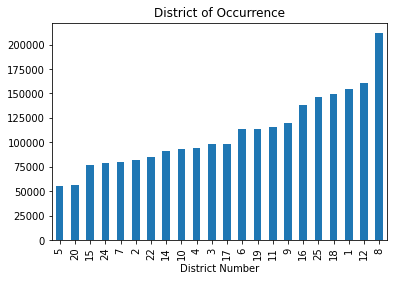

In [1178]:
test["DISTRICT"].value_counts().sort_values().plot(kind = 'bar',title= 'District of Occurrence',xlabel= 'District Number')

<AxesSubplot:>

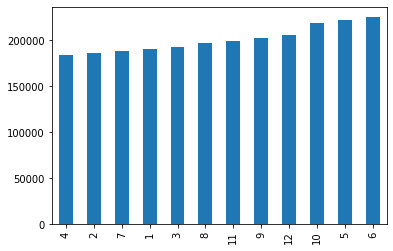

In [1179]:
test["CRASH_MONTH"].value_counts().sort_values().plot(kind = 'bar')

<AxesSubplot:title={'center':'Time When Most Crash Occur in 24 Hrs'}, xlabel='Hour of Day', ylabel='Counts'>

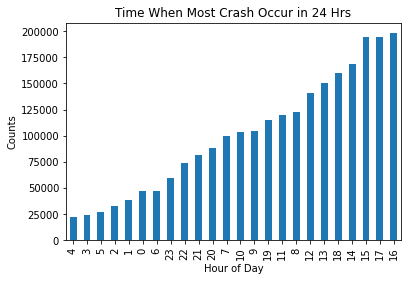

In [1180]:
test['CRASH_HOUR'].value_counts().sort_values().plot(kind = 'bar',title = 'Time When Most Crash Occur in 24 Hrs',xlabel = "Hour of Day", ylabel = "Counts")

In [1181]:
col = 'CRASH_HOUR'
conditions = [test[col].between(5,11),test[col].between(12,17),test[col].between(18,21),test[col].between(22,24),test[col].between(0,4)]
choices = ['Morning','Afternoon','Evening','Night','Night']
test["CRASH_TOD"]= np.select(conditions,choices,default = np.nan)
# test["CRASH_HOUR"] = np.where(test['CRASH_HOUR'].between(5,11),'Morning',test['CRASH_HOUR'])
# test["CRASH_HOUR"] = np.where(test['CRASH_HOUR'].between(12,17),'Afternoon',test['CRASH_HOUR'])
# test["CRASH_HOUR"] = np.where(test['CRASH_HOUR'].between(18,21),'Evening',test['CRASH_HOUR'])
# test["CRASH_HOUR"] = np.where(test['CRASH_HOUR'].between(22,24),'Night',test['CRASH_HOUR'])
# test["CRASH_HOUR"] = np.where(test['CRASH_HOUR'].between(1,4),'Night',test['CRASH_HOUR'])

In [1182]:
test['CRASH_TOD'].value_counts()

Afternoon    1047401
Morning       624166
Evening       444778
Night         296405
Name: CRASH_TOD, dtype: int64

In [1183]:
model_data['WEATHER_CONDITION'].value_counts()

CLEAR                       1929814
RAIN                         222811
SNOW                          88970
UNKNOWN                       76334
CLOUDY/OVERCAST               75660
OTHER                          7434
FOG/SMOKE/HAZE                 3995
SLEET/HAIL                     3428
FREEZING RAIN/DRIZZLE          3163
BLOWING SNOW                    730
SEVERE CROSS WIND GATE          405
BLOWING SAND, SOIL, DIRT          8
Name: WEATHER_CONDITION, dtype: int64

<AxesSubplot:title={'center':'Common Crash Month'}, xlabel='Month by Number', ylabel='Crash Count'>

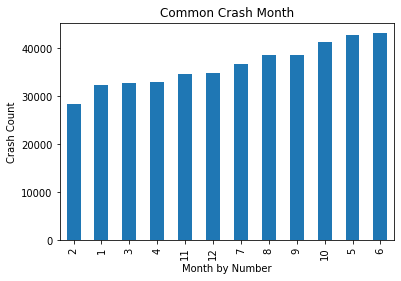

In [1184]:
injured_df["CRASH_MONTH"].value_counts().sort_values().plot(kind = 'bar',title = 'Common Crash Month',xlabel= 'Month by Number', ylabel = 'Crash Count')

In [1185]:
col = 'CRASH_MONTH'
conditions = [test[col].between(1,3),test[col].between(4,6),test[col].between(7,9),test[col].between(10,12)]
choices = ['Q1','Q2','Q3','Q4']
test["QUARTER"]= np.select(conditions,choices,default = np.nan)

Q2    631565
Q4    623000
Q3    588122
Q1    570063
Name: QUARTER, dtype: int64

<AxesSubplot:title={'center':'Age Density Curve'}, ylabel='Density'>

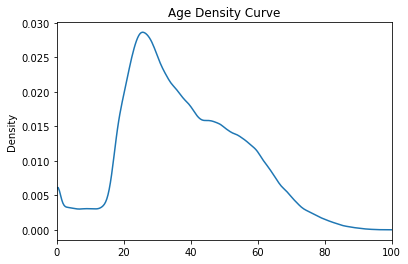

In [1198]:
model_data["AGE"].plot(kind = 'density',xlim = (0,100),title = 'Age Density Curve')

In [1187]:
injured_df["CRASH_HOUR"].value_counts()

16    33361
17    32523
15    32345
18    28586
14    28340
13    26106
12    22921
19    22663
11    20640
8     19609
20    18192
21    17632
10    17416
9     17149
22    16981
7     16511
23    13477
0     11359
6      9174
1      8530
2      7668
3      5661
5      5520
4      4953
Name: CRASH_HOUR, dtype: int64

In [1188]:
injured_df['WEATHER_CONDITION'].value_counts()

CLEAR                     350984
RAIN                       46642
CLOUDY/OVERCAST            15092
SNOW                       14564
UNKNOWN                     5600
OTHER                       1768
FREEZING RAIN/DRIZZLE        852
FOG/SMOKE/HAZE               806
SLEET/HAIL                   749
BLOWING SNOW                 159
SEVERE CROSS WIND GATE       101
Name: WEATHER_CONDITION, dtype: int64

In [1189]:
fata_sub['CRASH_MONTH'].value_counts()

5     845
7     462
6     452
11    368
10    357
3     343
8     334
9     287
4     276
1     274
12    252
2     146
Name: CRASH_MONTH, dtype: int64

In [1190]:
fata_sub['CRASH_HOUR'].value_counts()

0     560
23    392
21    320
22    221
1     219
16    213
13    196
12    196
20    195
19    189
2     187
10    173
3     162
18    162
4     146
17    142
15    123
11    117
9     113
7      92
14     89
5      81
8      78
6      30
Name: CRASH_HOUR, dtype: int64

In [1191]:
fata_sub["WEATHER_CONDITION"].value_counts()

CLEAR              3813
RAIN                352
CLOUDY/OVERCAST      90
SNOW                 65
UNKNOWN              64
FOG/SMOKE/HAZE        8
OTHER                 4
Name: WEATHER_CONDITION, dtype: int64

In [1192]:
fata_sub["SAFETY_EQUIPMENT"].value_counts()

USAGE UNKNOWN                                 2098
SAFETY BELT USED                              1258
NONE PRESENT                                   427
NONE                                           244
SAFETY BELT NOT USED                           196
HELMET NOT USED                                 64
DOT COMPLIANT MOTORCYCLE HELMET                 42
HELMET USED                                     16
CHILD RESTRAINT USED                            10
CHILD RESTRAINT - REAR FACING                    9
CHILD RESTRAINT NOT USED                         8
CHILD RESTRAINT - FORWARD FACING                 8
WHEELCHAIR                                       8
BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)       4
NOT DOT COMPLIANT MOTORCYCLE HELMET              2
CHILD RESTRAINT - TYPE UNKNOWN                   2
Name: SAFETY_EQUIPMENT, dtype: int64

In [1193]:
non_injured_df

,PERSON_TYPE,SEX,AGE,EJECTION,AIRBAG_DEPLOYED,DRIVER_ACTION,PEDPEDAL_ACTION,PHYSICAL_CONDITION,BAC_RESULT VALUE,SAFETY_EQUIPMENT,...,STREET_DIRECTION,BEAT_OF_OCCURRENCE,WORK_ZONE_I,INJURIES_TOTAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,TRAFFICWAY_TYPE,LANE_CNT,FATAL
0,DRIVER,M,25.0,NONE,DEPLOYMENT UNKNOWN,UNKNOWN,UNKNOWN/NA,UNKNOWN,0.0,NONE PRESENT,...,N,1531.0,N,0.0,3,7,9,NOT DIVIDED,NaN,0.0
1,DRIVER,M,25.0,NONE,DEPLOYMENT UNKNOWN,UNKNOWN,UNKNOWN/NA,UNKNOWN,0.0,NONE PRESENT,...,N,1531.0,N,0.0,3,7,9,NOT DIVIDED,NaN,0.0
2,DRIVER,M,25.0,NONE,DEPLOYMENT UNKNOWN,UNKNOWN,UNKNOWN/NA,UNKNOWN,0.0,NONE PRESENT,...,N,1531.0,N,0.0,3,7,9,NOT DIVIDED,NaN,0.0
3,DRIVER,M,37.0,NONE,DID NOT DEPLOY,NONE,UNKNOWN/NA,NORMAL,0.0,SAFETY BELT USED,...,W,613.0,N,0.0,22,2,4,DIVIDED - W/MEDIAN (NOT RAISED),NaN,0.0
4,DRIVER,M,37.0,NONE,DID NOT DEPLOY,NONE,UNKNOWN/NA,NORMAL,0.0,SAFETY BELT USED,...,W,613.0,N,0.0,22,2,4,DIVIDED - W/MEDIAN (NOT RAISED),NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2412771,DRIVER,F,74.0,NONE,DID NOT DEPLOY,UNKNOWN,UNKNOWN/NA,UNKNOWN,0.0,USAGE UNKNOWN,...,N,1422.0,N,0.0,16,2,6,DIVIDED - W/MEDIAN (NOT RAISED),NaN,0.0
2412772,DRIVER,M,NaN,NONE,DEPLOYMENT UNKNOWN,UNKNOWN,UNKNOWN/NA,UNKNOWN,0.0,USAGE UNKNOWN,...,W,1732.0,N,0.0,13,2,6,PARKING LOT,NaN,0.0
2412773,DRIVER,M,NaN,NONE,DEPLOYMENT UNKNOWN,UNKNOWN,UNKNOWN/NA,UNKNOWN,0.0,USAGE UNKNOWN,...,W,1732.0,N,0.0,13,2,6,PARKING LOT,NaN,0.0
2412774,DRIVER,M,24.0,NONE,NOT APPLICABLE,OTHER,UNKNOWN/NA,NORMAL,0.0,SAFETY BELT USED,...,W,1732.0,N,0.0,13,2,6,PARKING LOT,NaN,0.0


In [1199]:
test.drop_duplicates(inplace = True)

In [1200]:
test.columns

Index(['PERSON_TYPE', 'SEX', 'AGE', 'EJECTION', 'AIRBAG_DEPLOYED',
       'DRIVER_ACTION', 'PEDPEDAL_ACTION', 'PHYSICAL_CONDITION',
       'BAC_RESULT VALUE', 'SAFETY_EQUIPMENT', 'CRASH_UNIT_ID', 'MAKE',
       'MODEL', 'VEHICLE_TYPE', 'VEHICLE_DEFECT', 'TRAVEL_DIRECTION',
       'MANEUVER', 'FIRST_CONTACT_POINT', 'FIRE_I', 'POSTED_SPEED_LIMIT',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_DIRECTION',
       'BEAT_OF_OCCURRENCE', 'WORK_ZONE_I', 'INJURIES_TOTAL', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'TRAFFICWAY_TYPE', 'LANE_CNT',
       'FATAL', 'BEAT_NUM', 'DISTRICT', 'CRASH_TOD', 'QUARTER'],
      dtype='object')

In [1201]:
test.isnull().sum()

PERSON_TYPE                      0
SEX                              0
AGE                         639450
EJECTION                         0
AIRBAG_DEPLOYED                  0
DRIVER_ACTION               454207
PEDPEDAL_ACTION                  0
PHYSICAL_CONDITION               0
BAC_RESULT VALUE                 0
SAFETY_EQUIPMENT                 0
CRASH_UNIT_ID                    0
MAKE                             0
MODEL                            0
VEHICLE_TYPE                     0
VEHICLE_DEFECT                   0
TRAVEL_DIRECTION                 0
MANEUVER                         0
FIRST_CONTACT_POINT              0
FIRE_I                           0
POSTED_SPEED_LIMIT               0
WEATHER_CONDITION                0
LIGHTING_CONDITION               0
FIRST_CRASH_TYPE                 0
ALIGNMENT                        0
ROADWAY_SURFACE_COND             0
ROAD_DEFECT                      0
CRASH_TYPE                       0
PRIM_CONTRIBUTORY_CAUSE          0
SEC_CONTRIBUTORY_CAU

In [1202]:
fata_group = model_data.groupby('FATAL')

In [1203]:
inj_samp=test[test["INJURIES_TOTAL"]>0].sample(n=40000)
ok_samp=test[test["INJURIES_TOTAL"]==0].sample(n=40000)
testing_samp = test.sample(8000)

fifty_fifty = pd.concat([inj_samp,ok_samp])
fifty_fifty = fifty_fifty.sample(n=80000)
fifty_fifty

,PERSON_TYPE,SEX,AGE,EJECTION,AIRBAG_DEPLOYED,DRIVER_ACTION,PEDPEDAL_ACTION,PHYSICAL_CONDITION,BAC_RESULT VALUE,SAFETY_EQUIPMENT,...,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,TRAFFICWAY_TYPE,LANE_CNT,FATAL,BEAT_NUM,DISTRICT,CRASH_TOD,QUARTER
1883184,DRIVER,F,49.0,NONE,DID NOT DEPLOY,UNKNOWN,UNKNOWN/NA,IMPAIRED - ALCOHOL,0.0,USAGE UNKNOWN,...,0,5,12,NOT DIVIDED,2.0,0.0,2513,25,Night,Q4
2175198,DRIVER,F,31.0,NONE,DID NOT DEPLOY,NONE,UNKNOWN/NA,NORMAL,0.0,USAGE UNKNOWN,...,21,1,8,NOT DIVIDED,4.0,0.0,814,8,Evening,Q3
438142,DRIVER,M,28.0,NONE,DID NOT DEPLOY,OTHER,UNKNOWN/NA,NORMAL,0.0,SAFETY BELT USED,...,15,1,7,NOT DIVIDED,2.0,0.0,2022,20,Afternoon,Q3
1934153,PEDESTRIAN,F,63.0,NONE,DEPLOYMENT UNKNOWN,NONE,NO ACTION,NORMAL,0.0,NONE PRESENT,...,9,4,3,DIVIDED - W/MEDIAN BARRIER,NaN,0.0,234,2,Morning,Q1
441265,DRIVER,X,NaN,NONE,DEPLOYMENT UNKNOWN,UNKNOWN,UNKNOWN/NA,UNKNOWN,0.0,USAGE UNKNOWN,...,16,7,5,DIVIDED - W/MEDIAN BARRIER,NaN,0.0,2022,20,Afternoon,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156645,DRIVER,M,NaN,NONE,"DEPLOYED, FRONT",IMPROPER LANE CHANGE,UNKNOWN/NA,UNKNOWN,0.0,USAGE UNKNOWN,...,22,5,2,NOT DIVIDED,NaN,0.0,2514,25,Night,Q1
242962,DRIVER,M,NaN,NONE,DEPLOYMENT UNKNOWN,UNKNOWN,UNKNOWN/NA,UNKNOWN,0.0,USAGE UNKNOWN,...,15,5,12,PARKING LOT,NaN,0.0,2531,25,Afternoon,Q4
2053655,DRIVER,M,38.0,NONE,DID NOT DEPLOY,IMPROPER TURN,UNKNOWN/NA,UNKNOWN,0.0,USAGE UNKNOWN,...,14,3,1,NOT DIVIDED,NaN,0.0,1432,14,Afternoon,Q1
1917107,PASSENGER,F,31.0,NONE,DID NOT DEPLOY,NaN,UNKNOWN/NA,UNKNOWN,0.0,SAFETY BELT USED,...,21,6,2,NOT DIVIDED,NaN,0.0,333,3,Evening,Q1


In [1205]:
fifty_fifty.columns

Index(['PERSON_TYPE', 'SEX', 'AGE', 'EJECTION', 'AIRBAG_DEPLOYED',
       'DRIVER_ACTION', 'PEDPEDAL_ACTION', 'PHYSICAL_CONDITION',
       'BAC_RESULT VALUE', 'SAFETY_EQUIPMENT', 'CRASH_UNIT_ID', 'MAKE',
       'MODEL', 'VEHICLE_TYPE', 'VEHICLE_DEFECT', 'TRAVEL_DIRECTION',
       'MANEUVER', 'FIRST_CONTACT_POINT', 'FIRE_I', 'POSTED_SPEED_LIMIT',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_DIRECTION',
       'BEAT_OF_OCCURRENCE', 'WORK_ZONE_I', 'INJURIES_TOTAL', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'TRAFFICWAY_TYPE', 'LANE_CNT',
       'FATAL', 'BEAT_NUM', 'DISTRICT', 'CRASH_TOD', 'QUARTER'],
      dtype='object')

In [1207]:
fifty=fifty_fifty[['PERSON_TYPE', 'SEX', 'AGE', 'EJECTION', 'AIRBAG_DEPLOYED',
       'DRIVER_ACTION', 'PEDPEDAL_ACTION', 'PHYSICAL_CONDITION',
       'BAC_RESULT VALUE', 'SAFETY_EQUIPMENT', 'CRASH_UNIT_ID', 'MAKE',
       'MODEL', 'VEHICLE_TYPE', 'VEHICLE_DEFECT', 'TRAVEL_DIRECTION',
       'MANEUVER', 'FIRST_CONTACT_POINT', 'FIRE_I', 'POSTED_SPEED_LIMIT',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_DIRECTION',
       'BEAT_OF_OCCURRENCE', 'WORK_ZONE_I', 'INJURIES_TOTAL',
       'CRASH_DAY_OF_WEEK', 'TRAFFICWAY_TYPE',
        'DISTRICT', 'CRASH_TOD', 'QUARTER']]

In [ ]:
fifty_model = pd.get_dummies(fifty, columns = ['PERSON_TYPE', 'SEX', 'AGE', 'EJECTION', 'AIRBAG_DEPLOYED',
       'DRIVER_ACTION', 'PEDPEDAL_ACTION', 'PHYSICAL_CONDITION',
       'BAC_RESULT VALUE', 'SAFETY_EQUIPMENT', 'MAKE',
       'MODEL', 'VEHICLE_TYPE', 'VEHICLE_DEFECT', 'TRAVEL_DIRECTION',
       'MANEUVER', 'FIRST_CONTACT_POINT', 'FIRE_I', 'POSTED_SPEED_LIMIT',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_DIRECTION',
        'WORK_ZONE_I', 'INJURIES_TOTAL',
       'CRASH_DAY_OF_WEEK', 'TRAFFICWAY_TYPE',
        'DISTRICT', 'CRASH_TOD', 'QUARTER'],drop_first = True)
fifty_model

In [ ]:
y = fifty_model['INJURIES_TOTAL']
X = fifty_model.drop(columns = ['INJURIES_TOTAL'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
model = LogisticRegression(n_jobs= -1)
model.fit(X_train,y_train)

samp_pred = model.predict(X_test)
samp_score = model.score(X_test,y_test)

In [ ]:
samp_score

In [ ]:
y = fifty_model['INJURIES_TOTAL']
X = fifty_model.drop(columns = ['INJURIES_TOTAL'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2 , random_state = 0)
regressor = RandomForestClassifier(n_estimators = 20,random_state = 0)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

In [ ]:
print(samp_score)

In [ ]:
ten_rand = ten_samp.sample(n= 50000) 

In [ ]:
ten_rand.columns

In [ ]:
ten_dum = pd.get_dummies(ten_rand, columns = ['EJECTION','AIRBAG_DEPLOYED',
       'SAFETY_EQUIPMENT',
       'MODEL','FIRST_CONTACT_POINT','SEX','AGE','CRASH_HOUR','CRASH_MONTH'])

In [ ]:
ten_samp.columns


In [ ]:
ten_rand.columns

In [ ]:
ten_dum.columns

In [ ]:
y = ten_dum['INJURIES_TOTAL']
X = ten_dum.drop(columns = ['INJURIES_TOTAL'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
model = LogisticRegression(n_jobs= -1)
model.fit(X_train,y_train)

samp_pred = model.predict(X_test)
samp_score = model.score(X_test,y_test)

In [ ]:
print(samp_score)

In [ ]:
y = ten_dum['INJURIES_TOTAL']
X = ten_dum.drop(columns = ['INJURIES_TOTAL'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2 , random_state = 0)
regressor = RandomForestClassifer(n_estimators = 20,random_state = 0)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

In [ ]:

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(regressor, X_test, y_test)


In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split
rfc = RandomForestClassifier(n_estimators=10, random_state=0)
rfc.fit(X_train, y_train)
ax = plt.gca()
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax, alpha=0.8)

plt.show()

In [ ]:
regressor

In [ ]:
# import xgboost as xgb
# import shap

# # train XGBoost model
# Xd = ten_dum.drop(columns= ['INJURIES_TOTAL'])
# y = ten_rand["INJURIES_TOTAL"]
# models = xgb.XGBClassifier().fit(Xd, y)

# # compute SHAP values
# explainer = shap.Explainer(model, Xd)
# shap_values = explainer(Xd)

# fig, ax= plt.subplots()
# shap.plots.bar(shap_values,max_display= 15)
# plt.style.use('dark_background')